In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [244]:
df = pd.read_csv('Bank/bank_data.csv')

In [245]:
df_copy = df.copy()

In [246]:
df_copy.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,NaN,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,NaN,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no


In [247]:
df.shape

(4521, 18)

In [248]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4521 non-null   int64  
 1   age         4521 non-null   int64  
 2   job         4521 non-null   object 
 3   marital     4510 non-null   object 
 4   education   4514 non-null   object 
 5   default     4521 non-null   object 
 6   balance     4515 non-null   float64
 7   housing     4518 non-null   object 
 8   loan        4518 non-null   object 
 9   contact     4486 non-null   object 
 10  day         4521 non-null   int64  
 11  month       4521 non-null   object 
 12  duration    4514 non-null   float64
 13  campaign    4521 non-null   int64  
 14  pdays       4521 non-null   int64  
 15  previous    4521 non-null   int64  
 16  poutcome    4521 non-null   object 
 17  y           4521 non-null   object 
dtypes: float64(2), int64(6), object(10)
memory usage: 635.9+ KB


In [249]:
df_copy.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital       11
education      7
default        0
balance        6
housing        3
loan           3
contact       35
day            0
month          0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [250]:
sumnum = df_copy.describe()
sumnum

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4515.000000,4521.000000,4514.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1420.750831,15.915284,263.884360,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.178500,8.247667,259.812643,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,68.500000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1477.000000,21.000000,329.750000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Filling null values from education column

In [251]:
df_copy['education'].value_counts()

secondary    2302
tertiary     1349
primary       676
unknown       187
Name: education, dtype: int64

In [252]:
df_copy['education'].mode()

0    secondary
dtype: object

In [253]:
# it seems that the secondary education has been in most rows. 
# we will fill NaN values in education with the category which has more occured.
edu_null = df_copy[df_copy['education'].isnull()].index.tolist()
edu_null

[0, 37, 111, 358, 365, 515, 770]

In [254]:
# filling null values with 'secondary'
df_copy['education'].iloc[edu_null] = 'secondary'

### Filling Null values from Martial Column

In [255]:
df_copy['marital'].value_counts()

married     2790
single      1193
divorced     527
Name: marital, dtype: int64

In [256]:
df_blue = df_copy[df_copy['job']== 'blue-collar']

In [257]:
df_blue

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no
14,14,31,blue-collar,married,secondary,no,360.0,yes,yes,cellular,29,jan,89.0,1,241,1,failure,no
18,18,25,blue-collar,single,primary,no,-221.0,yes,no,unknown,23,may,250.0,1,-1,0,unknown,no
26,26,55,blue-collar,married,primary,no,627.0,yes,no,unknown,5,may,247.0,1,-1,0,unknown,no
37,37,32,blue-collar,married,secondary,no,2089.0,yes,no,cellular,14,nov,132.0,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,4511,46,blue-collar,married,secondary,no,668.0,yes,no,unknown,15,may,1263.0,2,-1,0,unknown,yes
4512,4512,40,blue-collar,married,secondary,no,1100.0,yes,no,unknown,29,may,660.0,2,-1,0,unknown,no
4513,4513,49,blue-collar,married,secondary,no,322.0,no,no,cellular,14,aug,356.0,2,-1,0,unknown,no
4514,4514,38,blue-collar,married,secondary,no,1205.0,yes,no,cellular,20,apr,45.0,4,153,1,failure,no


In [258]:
df_blue.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       6
education     0
default       0
balance       2
housing       1
loan          1
contact       8
day           0
month         0
duration      1
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [259]:
df_blue.shape

(946, 18)

In [260]:
df_blue['marital'].value_counts()

married     689
single      173
divorced     78
Name: marital, dtype: int64

In [261]:
# people who have a job profile as a blue-collar are married. Only 6 of them are unmarried. 
# so we will fill those 6 NaN values with married.

In [262]:
blue_married_null = df_copy[(df_copy['job'] == 'blue-collar') & (df_copy['marital'].isnull())].index.tolist()

In [263]:
blue_married_null

[46, 50, 54, 310, 312, 445]

In [264]:
df_copy['marital'].iloc[blue_married_null] = 'married'

In [265]:
marital_null = df_copy[df_copy['marital'].isnull()].index.tolist()

In [266]:
marital_null

[49, 52, 56, 306, 367]

In [267]:
df_copy['marital'].iloc[marital_null] = 'married'

In [268]:
df_copy.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
balance        6
housing        3
loan           3
contact       35
day            0
month          0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### filling NaN values of balance

In [269]:
df['balance'].mean()

1420.750830564784

#### we will perform average imputation

In [270]:
balance_null = df_copy[df_copy['balance'].isnull()].index.tolist()

In [271]:
df_copy['balance'].iloc[balance_null] = '1420.75'

In [272]:
df_copy.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        3
loan           3
contact       35
day            0
month          0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### filling NaN Values in housing column

In [273]:
df_blue['housing'].value_counts()

yes    694
no     251
Name: housing, dtype: int64

In [274]:
housing_null = df_copy[df_copy['housing'].isnull()].index.tolist()

In [275]:
df_copy['housing'].iloc[housing_null] = 'yes'

In [276]:
df_copy.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           3
contact       35
day            0
month          0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Filling NaN Values in Loan Column

In [277]:
df_copy['loan'].value_counts()

no     3827
yes     691
Name: loan, dtype: int64

In [278]:
loan_null = df_copy[df_copy['loan'].isnull()].index.tolist()

In [279]:
df_copy['loan'].iloc[loan_null] = 'no'

In [280]:
df_copy.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact       35
day            0
month          0
duration       7
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Filling NaN values of contact column

In [281]:
df_copy['contact'].value_counts()

cellular     2869
unknown      1319
telephone     298
Name: contact, dtype: int64

In [282]:
contact_null = df_copy[df_copy['contact'].isnull()].index.tolist()

In [283]:
df_copy['contact'].iloc[contact_null] = 'unknown'

In [284]:
df_copy.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      7
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

### Filling the NaN values of duration column

In [285]:
df_copy['duration'].describe()

count    4514.000000
mean      263.884360
std       259.812643
min         4.000000
25%       104.000000
50%       185.000000
75%       329.750000
max      3025.000000
Name: duration, dtype: float64

In [286]:
df_cell = df_copy[df_copy['contact'] == 'cellular']
df_cell

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,secondary,no,1787.0,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,NaN,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
5,5,35,management,single,tertiary,no,747.0,no,no,cellular,23,feb,141.0,2,176,3,failure,no
6,6,36,self-employed,married,tertiary,no,307.0,yes,no,cellular,14,may,341.0,1,330,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,4515,32,services,single,secondary,no,473.0,yes,no,cellular,7,jul,624.0,5,-1,0,unknown,no
4516,4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329.0,5,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151.0,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129.0,4,211,3,other,no


In [287]:
df_cell.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      5
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [288]:
df_cell_dur = df_cell['duration']
df_cell_val = []

In [289]:
total = 0
for i in (df_cell_dur):
    if i > 0:
        df_cell_val.append(i)
        total += i

In [290]:
cell_average_duration = total/len(df_cell_dur)
cell_average_duration

266.45765074939004

In [291]:
durataion_null = df_copy[df_copy['duration'].isnull()].index.tolist()

In [292]:
df_copy['duration'].iloc[durataion_null] = 266.45

In [293]:
df_copy.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

# Encoding Stage

In [294]:
df_copy.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,secondary,no,1787.0,no,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,266.45,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.00,1,-1,0,unknown,no


In [295]:
df_copy1 = df_copy.drop(['Unnamed: 0'], axis = 1)

In [296]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,secondary,no,1787.0,no,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,266.45,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.00,1,-1,0,unknown,no


### Encoding of marital column 
### there are 3 categories in the marutal column 
### 1. married 2. single  3. divorced
### we will be using label encoding 

In [297]:
df_copy1['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [298]:
from sklearn import preprocessing 

In [299]:
marital_encoder = preprocessing.LabelEncoder()

In [300]:
df_copy1['marital']= marital_encoder.fit_transform(df_copy1['marital'])

In [301]:
df_copy1['marital'].unique()

array([1, 2, 0])

In [302]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,secondary,no,1787.0,no,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789.0,yes,yes,cellular,11,may,266.45,1,339,4,failure,no
2,35,management,2,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00,1,330,1,failure,no
3,30,management,1,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0.0,yes,no,unknown,5,may,226.00,1,-1,0,unknown,no


#### For job column we will be using Frequency Encoding. We will map the frequency of each category in its place.

In [303]:
len(df_copy1['job'].unique())

12

#### There are 12 labels in the job column 
#### Lets check how many times each label has occured

In [304]:
df_copy1.job.value_counts().to_dict()

{'management': 969,
 'blue-collar': 946,
 'technician': 768,
 'admin.': 478,
 'services': 417,
 'retired': 230,
 'self-employed': 183,
 'entrepreneur': 168,
 'unemployed': 128,
 'housemaid': 112,
 'student': 84,
 'unknown': 38}

In [305]:
job_frequency = df_copy1.job.value_counts().to_dict()

In [306]:
df_copy1.job = df_copy1.job.map(job_frequency)

In [307]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,secondary,no,1787.0,no,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,417,1,secondary,no,4789.0,yes,yes,cellular,11,may,266.45,1,339,4,failure,no
2,35,969,2,tertiary,no,1350.0,yes,no,cellular,16,apr,185.00,1,330,1,failure,no
3,30,969,1,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,946,1,secondary,no,0.0,yes,no,unknown,5,may,226.00,1,-1,0,unknown,no


#### For default column we will use binary encoding, whcih is 1 for "YES" and 0 for "NO".

In [308]:
df_copy1['default'].unique()

array(['no', 'yes'], dtype=object)

In [309]:
# replacing the values
df_copy1['default'].replace({'yes':1,'no':0}, inplace = True)
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,secondary,0,1787.0,no,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,417,1,secondary,0,4789.0,yes,yes,cellular,11,may,266.45,1,339,4,failure,no
2,35,969,2,tertiary,0,1350.0,yes,no,cellular,16,apr,185.00,1,330,1,failure,no
3,30,969,1,tertiary,0,1476.0,yes,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,946,1,secondary,0,0.0,yes,no,unknown,5,may,226.00,1,-1,0,unknown,no


In [310]:
df_copy1.default.value_counts().to_dict()

{0: 4445, 1: 76}

In [311]:
df_copy1.housing.value_counts().to_dict()

{'yes': 2560, 'no': 1961}

#### Similarly for the housing column we will be using binary encoding

In [312]:
# replacing the values
df_copy1['housing'].replace({'yes':1,'no':0}, inplace = True)
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,secondary,0,1787.0,0,no,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,417,1,secondary,0,4789.0,1,yes,cellular,11,may,266.45,1,339,4,failure,no
2,35,969,2,tertiary,0,1350.0,1,no,cellular,16,apr,185.00,1,330,1,failure,no
3,30,969,1,tertiary,0,1476.0,1,yes,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,946,1,secondary,0,0.0,1,no,unknown,5,may,226.00,1,-1,0,unknown,no


In [313]:
df_copy1.loan.value_counts().to_dict()

{'no': 3830, 'yes': 691}

#### Similarly for loan column, applying binary encoding.

In [314]:
# replacing the values
df_copy1['loan'].replace({'yes':1,'no':0}, inplace = True)
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,secondary,0,1787.0,0,0,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,417,1,secondary,0,4789.0,1,1,cellular,11,may,266.45,1,339,4,failure,no
2,35,969,2,tertiary,0,1350.0,1,0,cellular,16,apr,185.00,1,330,1,failure,no
3,30,969,1,tertiary,0,1476.0,1,1,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,946,1,secondary,0,0.0,1,0,unknown,5,may,226.00,1,-1,0,unknown,no


In [315]:
df_copy1.education.value_counts().to_dict()

{'secondary': 2309, 'tertiary': 1349, 'primary': 676, 'unknown': 187}

### In Education we will apply ordinal Encoding, as we can see that there are different educational qualifications.
### We can rank tham using ordinal encoding.

In [316]:
edu_dict = {
    'tertiary': 1,
    'secondary': 2,
    'primary': 3,
    'unknown': 4
}

In [317]:
# replacing the values
df_copy1['education'].replace(edu_dict, inplace = True)
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,2,0,1787.0,0,0,cellular,19,oct,79.00,1,-1,0,unknown,no
1,33,417,1,2,0,4789.0,1,1,cellular,11,may,266.45,1,339,4,failure,no
2,35,969,2,1,0,1350.0,1,0,cellular,16,apr,185.00,1,330,1,failure,no
3,30,969,1,1,0,1476.0,1,1,unknown,3,jun,199.00,4,-1,0,unknown,no
4,59,946,1,2,0,0.0,1,0,unknown,5,may,226.00,1,-1,0,unknown,no


In [318]:
df_copy1.contact.value_counts().to_dict()

{'cellular': 2869, 'unknown': 1354, 'telephone': 298}

### for contact section we will apply label encoding

In [319]:
contact_dict = {
    'cellular': 1,
    'telephone': 2,
    'unknown': 3
}

In [320]:
df_copy1['contact'].replace(contact_dict, inplace = True)

In [321]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,2,0,1787.0,0,0,1,19,oct,79.00,1,-1,0,unknown,no
1,33,417,1,2,0,4789.0,1,1,1,11,may,266.45,1,339,4,failure,no
2,35,969,2,1,0,1350.0,1,0,1,16,apr,185.00,1,330,1,failure,no
3,30,969,1,1,0,1476.0,1,1,3,3,jun,199.00,4,-1,0,unknown,no
4,59,946,1,2,0,0.0,1,0,3,5,may,226.00,1,-1,0,unknown,no


#### for month column, we will be using frequency encoding 

In [324]:
df_copy1.month.value_counts().to_dict()

{'may': 1398,
 'jul': 706,
 'aug': 633,
 'jun': 531,
 'nov': 389,
 'apr': 293,
 'feb': 222,
 'jan': 148,
 'oct': 80,
 'sep': 52,
 'mar': 49,
 'dec': 20}

In [325]:
month_frequency = df_copy1.month.value_counts().to_dict()

In [326]:
df_copy1.month = df_copy1.month.map(month_frequency)

In [327]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,2,0,1787.0,0,0,1,19,80,79.00,1,-1,0,unknown,no
1,33,417,1,2,0,4789.0,1,1,1,11,1398,266.45,1,339,4,failure,no
2,35,969,2,1,0,1350.0,1,0,1,16,293,185.00,1,330,1,failure,no
3,30,969,1,1,0,1476.0,1,1,3,3,531,199.00,4,-1,0,unknown,no
4,59,946,1,2,0,0.0,1,0,3,5,1398,226.00,1,-1,0,unknown,no


In [328]:
df_copy1.poutcome.value_counts().to_dict()

{'unknown': 3705, 'failure': 490, 'other': 197, 'success': 129}

#### Label Encoding on poutcome column

In [329]:
pout_dict = {
    'success':1,
    'failure':0,
    'other':2,
    'unknown':3
}

In [331]:
df_copy1['poutcome'].replace(pout_dict, inplace = True)

In [332]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,2,0,1787.0,0,0,1,19,80,79.00,1,-1,0,3,no
1,33,417,1,2,0,4789.0,1,1,1,11,1398,266.45,1,339,4,0,no
2,35,969,2,1,0,1350.0,1,0,1,16,293,185.00,1,330,1,0,no
3,30,969,1,1,0,1476.0,1,1,3,3,531,199.00,4,-1,0,3,no
4,59,946,1,2,0,0.0,1,0,3,5,1398,226.00,1,-1,0,3,no


In [333]:
y_dict = {
    'no': 0,
    'yes': 1
}

In [334]:
df_copy1['y'].replace(y_dict, inplace = True)

In [335]:
df_copy1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,128,1,2,0,1787.0,0,0,1,19,80,79.00,1,-1,0,3,0
1,33,417,1,2,0,4789.0,1,1,1,11,1398,266.45,1,339,4,0,0
2,35,969,2,1,0,1350.0,1,0,1,16,293,185.00,1,330,1,0,0
3,30,969,1,1,0,1476.0,1,1,3,3,531,199.00,4,-1,0,3,0
4,59,946,1,2,0,0.0,1,0,3,5,1398,226.00,1,-1,0,3,0


### We will take a look if there are any constant features in the dataset

In [336]:
from sklearn.feature_selection import VarianceThreshold
ver_thers = VarianceThreshold(threshold=0)
ver_thers.fit(df_copy1)

VarianceThreshold(threshold=0)

In [337]:
ver_thers.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

# Train Test Split

In [340]:
X = df_copy1.drop(['y'], axis = 1)
y = df_copy1['y']

In [341]:
from sklearn.model_selection import train_test_split

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [343]:
X_train.shape

(3164, 16)

In [345]:
y_train.shape

(3164,)

In [346]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,768,1,2,0,56.0,1,1,1,29,148,194.0,1,247,1,0
3480,47,417,1,2,0,440.0,1,0,3,12,531,91.0,1,-1,0,3
2125,52,768,1,2,0,3554.0,0,1,1,8,706,89.0,1,-1,0,3
3452,31,478,1,2,0,0.0,1,0,1,29,706,82.0,5,-1,0,3
1667,33,946,1,2,0,-346.0,1,1,3,23,1398,29.0,3,-1,0,3


In [347]:
y_train.head()

565     0
3480    0
2125    0
3452    0
1667    0
Name: y, dtype: int64

In [348]:
y_test.head()

4274    0
72      0
1065    0
3185    0
130     0
Name: y, dtype: int64

In [349]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,946,1,3,0,378.0,1,0,3,16,1398,427.0,3,-1,0,3
72,31,969,2,1,0,6248.0,1,0,3,9,1398,154.0,2,-1,0,3
1065,30,128,1,1,0,0.0,1,0,1,18,389,756.0,1,-1,0,3
3185,42,478,1,2,0,529.0,1,1,1,19,389,193.0,3,-1,0,3
130,41,946,1,3,0,168.0,1,0,1,18,389,187.0,3,-1,0,3


In [350]:
X_train.corr()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.148267,-0.388851,0.208803,-0.011219,-0.205779,-0.017501,0.009324,-0.002943,-0.099567,-0.031947,0.009286,-0.021113,-0.017355,-0.019084
job,-0.148267,1.000000,0.020492,-0.145763,-0.031884,0.155157,-0.006649,-0.002240,0.009028,0.086825,-0.003300,0.036705,0.027301,0.000857,-0.015040
marital,-0.388851,0.020492,1.000000,-0.094876,-0.035280,-0.022863,-0.051433,-0.059355,0.010289,-0.022732,0.042065,0.016235,0.026221,0.040455,-0.033687
education,0.208803,-0.145763,-0.094876,1.000000,0.022380,0.020278,-0.009258,0.164552,-0.006601,0.083107,-0.013691,0.003512,-0.020011,-0.040806,0.037465
default,-0.011219,-0.031884,-0.035280,0.022380,1.000000,0.020330,0.071169,0.018527,-0.008496,0.027385,-0.014986,-0.009691,-0.019531,-0.027310,0.045865
housing,-0.205779,0.155157,-0.022863,0.020278,0.020330,1.000000,0.031891,0.198437,-0.038186,0.361153,0.023729,-0.006622,0.105690,0.029826,-0.065615
loan,-0.017501,-0.006649,-0.051433,-0.009258,0.071169,0.031891,1.000000,-0.008238,-0.010985,0.007694,-0.003589,0.015042,-0.031877,-0.021236,0.039550
contact,0.009324,-0.002240,-0.059355,0.164552,0.018527,0.198437,-0.008238,1.000000,-0.022222,0.404696,-0.015644,0.022854,-0.246604,-0.187050,0.267231
day,-0.002943,0.009028,0.010289,-0.006601,-0.008496,-0.038186,-0.010985,-0.022222,1.000000,-0.007143,-0.026827,0.149335,-0.095790,-0.045221,0.065955
month,-0.099567,0.086825,-0.022732,0.083107,0.027385,0.361153,0.007694,0.404696,-0.007143,1.000000,0.017925,0.009932,-0.015031,-0.066626,0.104312


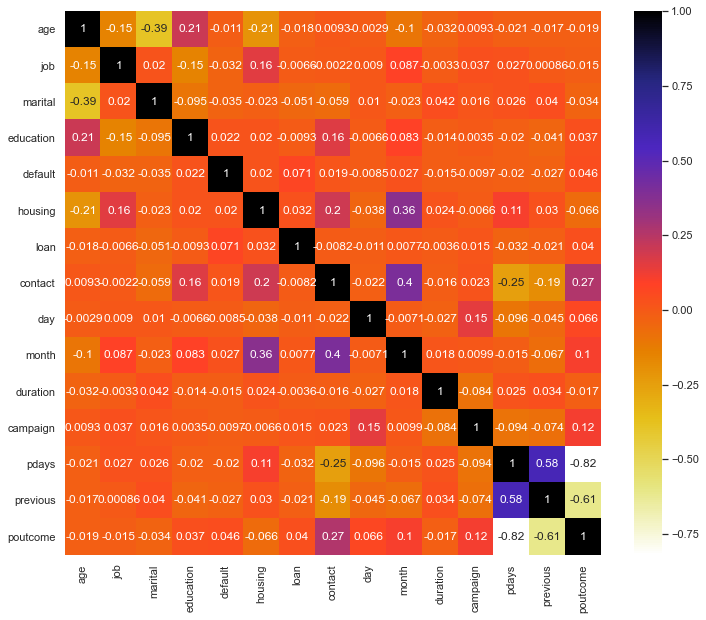

In [351]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Performing Standard Scaling because the features lie in the different ranges.

In [352]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler()
X_train = df_std.fit_transform(X_train)
X_test = df_std.fit_transform(X_test)

In [354]:
X_train[0:10, :]

array([[-0.09984865,  0.34201431, -0.24494478,  0.09897483, -0.12671432,
        -0.44565917,  0.88574599,  2.32483511, -0.73451996,  1.60076418,
        -1.33831301, -0.25971744, -0.58045022,  2.03111766,  0.26840534,
        -2.60031172],
       [ 0.56008806, -0.76302251, -0.24494478,  0.09897483, -0.12671432,
        -0.32132966,  0.88574599, -0.43013803,  1.46730017, -0.46576417,
        -0.50130739, -0.67197349, -0.58045022, -0.41006261, -0.32175067,
         0.44311107],
       [ 1.03147143,  0.34201431, -0.24494478,  0.09897483, -0.12671432,
         0.68690499, -1.12899184,  2.32483511, -0.73451996, -0.95200614,
        -0.11886357, -0.67997846, -0.58045022, -0.41006261, -0.32175067,
         0.44311107],
       [-0.94833871, -0.57097908, -0.24494478,  0.09897483, -0.12671432,
        -0.46379056,  0.88574599, -0.43013803, -0.73451996,  1.60076418,
        -0.11886357, -0.70799586,  0.72856225, -0.41006261, -0.32175067,
         0.44311107],
       [-0.75978537,  0.90240336, -0

# We are using Logistic Regression to predict the outcome

In [355]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [356]:
y_pred = classifier.predict(X_test)

In [357]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [358]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8798820928518791


In [360]:
print('Accuracy Score is :' , accuracy_score(y_test, y_pred)*100, '%')

Accuracy Score is : 87.9882092851879 %


# Lets test the performance of our model

In [361]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [364]:
cm

array([[1162,   28],
       [ 135,   32]], dtype=int64)